# Denoising the projections

In [1]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [11]:
from spire.tomography.tomography import AstraToolbox
from spire.utils import ims
from spire.operators.image import *
from spire.algorithms.fista import fista_wavelets
from pypwt import Wavelets
from scipy.ndimage.filters import median_filter

In [5]:
W = Wavelets(np.zeros_like(ph), "haar", 9, do_swt=1)
tomo = AstraToolbox(512, 44)
K2 = lambda x : tomo.proj(x)/tomo.n_a*pi/2
K2adj = lambda x : tomo.fbp(x)

In [6]:
ph = np.load("data/Brain512.npz")["data"]
data = tomo.proj(ph)
data_n = data + np.random.randn(*data.shape)*data.max()*1./100.

In [7]:
rec_fbp = tomo.fbp(data_n)

In [41]:
def denoise_wavelets(data_n, thresh=None, onedim=False):
    ndim = 1 if onedim else 2
    if thresh is None:
        # Donoho universal threshold
        sigma_empirical = estimate_noise_std(data_n)
        thresh = sigma_empirical * np.sqrt(2*np.log(data_n.size))
    W2 = Wavelets(data_n, "haar", 99, ndim=ndim, do_swt=1)
    W2.forward()
    W2.hard_threshold(thresh)
    W2.inverse()
    return np.copy(W2.image)

<IPython.core.display.Javascript object>


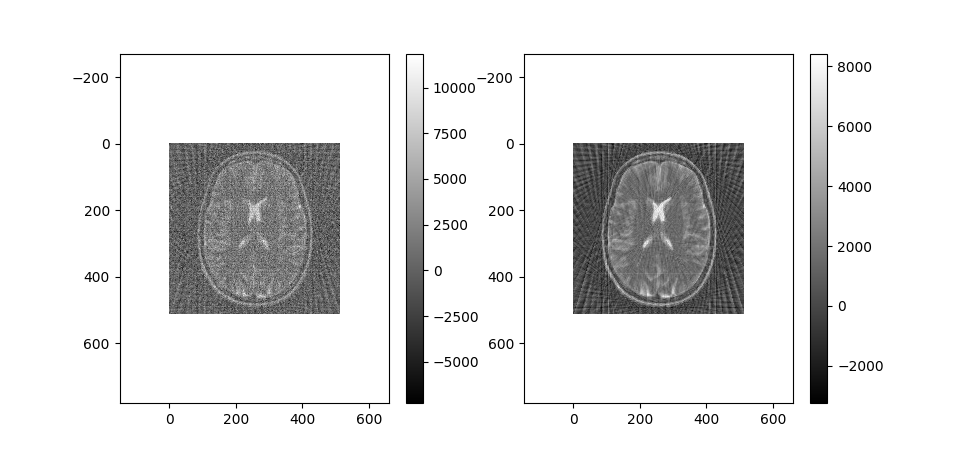

In [13]:
ims([rec_fbp, tomo.fbp(denoise_wavelets_1d(data_n))], cmap="gray")

In [30]:
en2, rec_w2 = fista_wavelets(data_n/tomo.n_a*pi/2, W, K2, K2adj, 5*sqrt(2), n_it=300, dta=True)


Warn: Lipschitz constant not provided, computing it with 20 iterations
Lip = 2.147685e+01
[0] : energy 7.709677e+09 	 fidelity 6.696092e+09 	 L1 1.433425e+08
[10] : energy 1.246371e+10 	 fidelity 1.888107e+09 	 L1 1.495617e+09
[20] : energy 1.826605e+10 	 fidelity 2.068398e+08 	 L1 2.553958e+09
[30] : energy 2.128655e+10 	 fidelity 5.730533e+06 	 L1 3.009562e+09
[40] : energy 2.190475e+10 	 fidelity 4.040466e+05 	 L1 3.097742e+09
[50] : energy 2.187024e+10 	 fidelity 2.930232e+05 	 L1 3.092878e+09
[60] : energy 2.185315e+10 	 fidelity 2.758981e+05 	 L1 3.090463e+09
[70] : energy 2.185789e+10 	 fidelity 2.559555e+05 	 L1 3.091137e+09
[80] : energy 2.185023e+10 	 fidelity 2.530009e+05 	 L1 3.090053e+09
[90] : energy 2.183959e+10 	 fidelity 2.523518e+05 	 L1 3.088549e+09
[100] : energy 2.182956e+10 	 fidelity 2.509792e+05 	 L1 3.087131e+09
[110] : energy 2.182002e+10 	 fidelity 2.505782e+05 	 L1 3.085781e+09
[120] : energy 2.181275e+10 	 fidelity 2.506460e+05 	 L1 3.084754e+09
[130] : ene

In [48]:
en3, rec_w3 = fista_wavelets(denoise_wavelets(data_n, thresh=1500, onedim=True)/tomo.n_a*pi/2, W, K2, K2adj, 5*sqrt(2), n_it=300, dta=True)

Warn: Lipschitz constant not provided, computing it with 20 iterations
Lip = 2.148747e+01
[0] : energy 7.683127e+09 	 fidelity 6.690501e+09 	 L1 1.403786e+08
[10] : energy 1.235802e+10 	 fidelity 1.887162e+09 	 L1 1.480803e+09
[20] : energy 1.814239e+10 	 fidelity 2.068863e+08 	 L1 2.536464e+09
[30] : energy 2.115554e+10 	 fidelity 5.679706e+06 	 L1 2.991043e+09
[40] : energy 2.176762e+10 	 fidelity 3.875032e+05 	 L1 3.078352e+09
[50] : energy 2.172694e+10 	 fidelity 2.802794e+05 	 L1 3.072613e+09
[60] : energy 2.170258e+10 	 fidelity 2.655552e+05 	 L1 3.069170e+09
[70] : energy 2.169952e+10 	 fidelity 2.486690e+05 	 L1 3.068740e+09
[80] : energy 2.168452e+10 	 fidelity 2.461617e+05 	 L1 3.066619e+09
[90] : energy 2.166674e+10 	 fidelity 2.456374e+05 	 L1 3.064104e+09
[100] : energy 2.165273e+10 	 fidelity 2.442314e+05 	 L1 3.062124e+09
[110] : energy 2.164404e+10 	 fidelity 2.433400e+05 	 L1 3.060895e+09
[120] : energy 2.163980e+10 	 fidelity 2.428508e+05 	 L1 3.060296e+09
[130] : ene

<IPython.core.display.Javascript object>


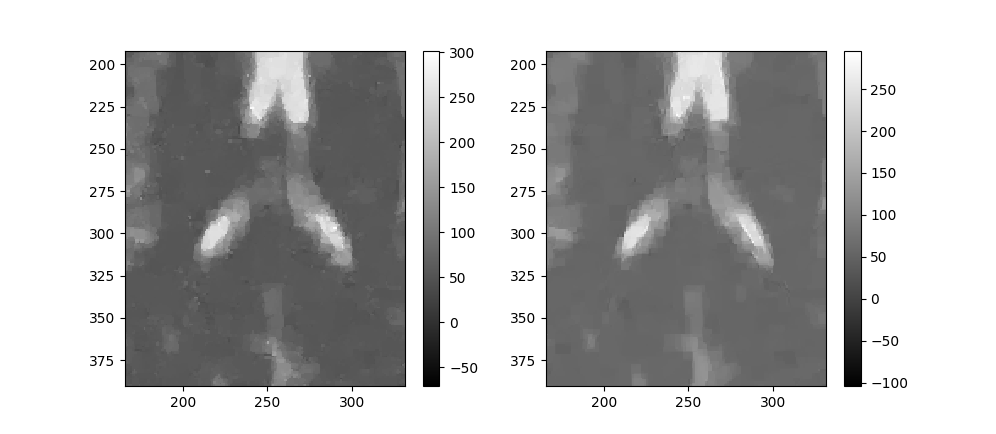

In [49]:
ims([median_filter(rec_w2, size=2), rec_w3], cmap="gray")

<IPython.core.display.Javascript object>


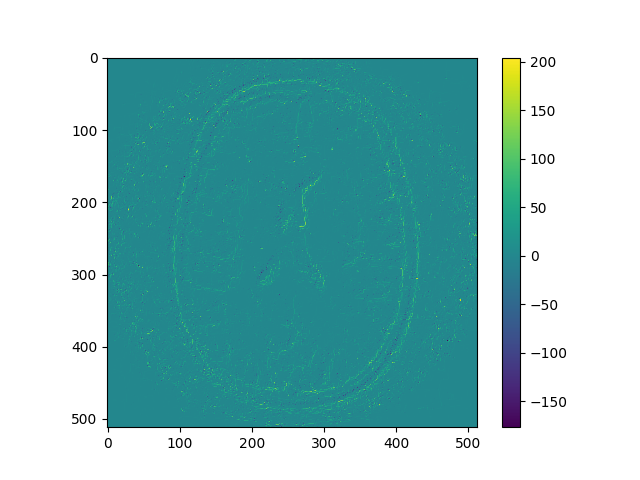

In [32]:
tomo.n_a

44